In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/modisco_seqlet_occurences/fibroblast"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [3]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_40,xs.pos.pattern_41,xs.pos.pattern_42,xs.pos.pattern_5,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9,xs.neg.pattern_0,xs.neg.pattern_1
0,chr1,3100163,3100629,total_peak_167,131,.,4.28928,13.1064,11.1800,203,...,0,0,0,0,0,0,0,0,0,0
1,chr1,3119547,3120355,total_peak_168a,492,.,5.76340,49.2829,46.9365,168,...,0,0,0,0,0,0,0,0,0,0
2,chr1,3119547,3120355,total_peak_168b,735,.,7.22953,73.5429,71.0421,507,...,0,0,0,0,0,0,0,0,0,0
3,chr1,3120360,3120610,total_peak_169,350,.,4.79919,35.0483,32.8216,134,...,0,0,0,0,0,0,0,0,0,0
4,chr1,3121342,3121870,total_peak_170a,654,.,6.68317,65.4566,63.0021,202,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191365,JH584304.1,100557,100853,total_peak_156,23654,.,16.20520,2365.4700,2359.7500,161,...,0,0,0,0,0,0,0,0,0,0
191366,JH584304.1,101688,101902,total_peak_157,1201,.,3.15913,120.1510,117.4480,104,...,0,0,0,0,0,0,0,0,0,0
191367,JH584304.1,103146,103422,total_peak_158,3423,.,5.09561,342.3690,339.2090,165,...,0,0,0,0,0,0,0,0,0,0
191368,JH584304.1,103764,104115,total_peak_159,15741,.,12.33960,1574.1200,1568.6300,110,...,0,0,0,0,0,0,0,0,0,0


In [4]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [7]:
from IPython.display import display


In [8]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_46673/3756136185.py:12: RuntimeWarning: divide by zero encountered in log10
  counts_nlp = -np.log10(counts_p)
/tmp/ipykernel_46673/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)


,pattern,counts_lfc,shap_lfc,counts_nlp,shap_nlp
43,xs.pos.pattern_1,0.021593,-0.054569,37.686632,inf
37,ss.pos.pattern_7,-0.191158,-0.037346,164.754238,inf
84,xs.pos.pattern_9,-0.288526,-0.047176,inf,inf
83,xs.pos.pattern_8,-0.247344,-0.041495,246.565742,inf
5,ss.pos.pattern_13,0.166492,0.065674,91.842628,inf
80,xs.pos.pattern_5,-0.277804,-0.051237,inf,inf
54,xs.pos.pattern_2,-0.161540,-0.030510,inf,inf
23,ss.pos.pattern_3,-0.192275,-0.036313,inf,inf
10,ss.pos.pattern_18,0.244636,0.077916,85.770259,inf
1,ss.pos.pattern_1,0.008097,-0.056653,25.000463,inf


In [9]:
import seaborn as sns
sns.set()

In [10]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

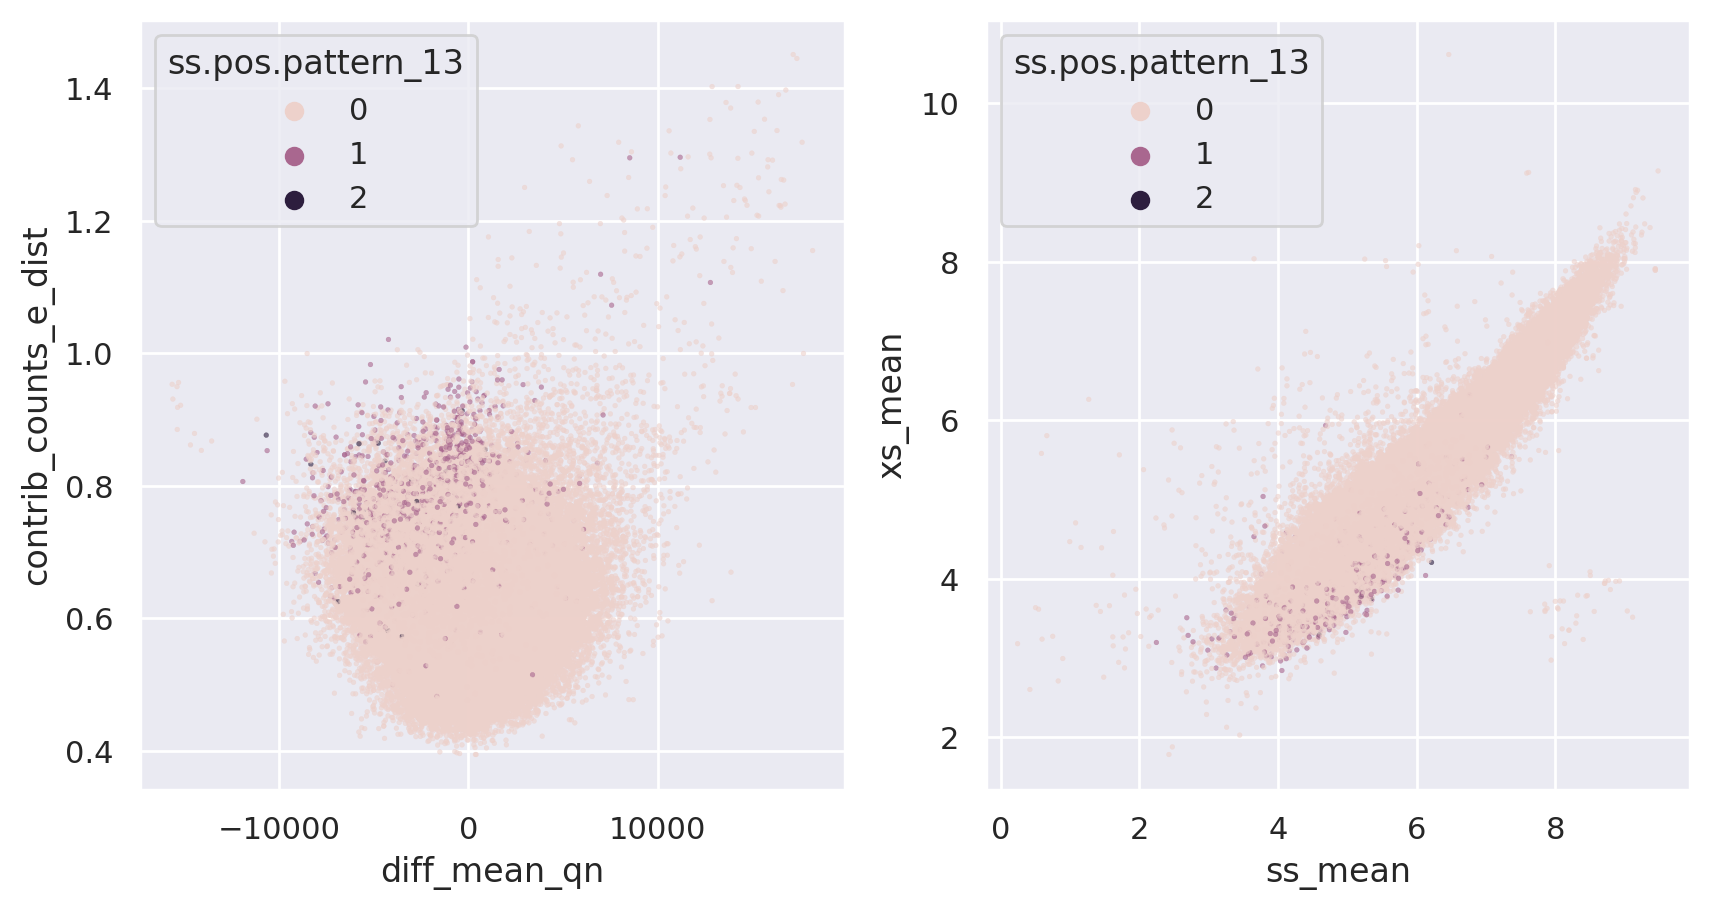

In [14]:
plot_pattern("ss.pos.pattern_13")


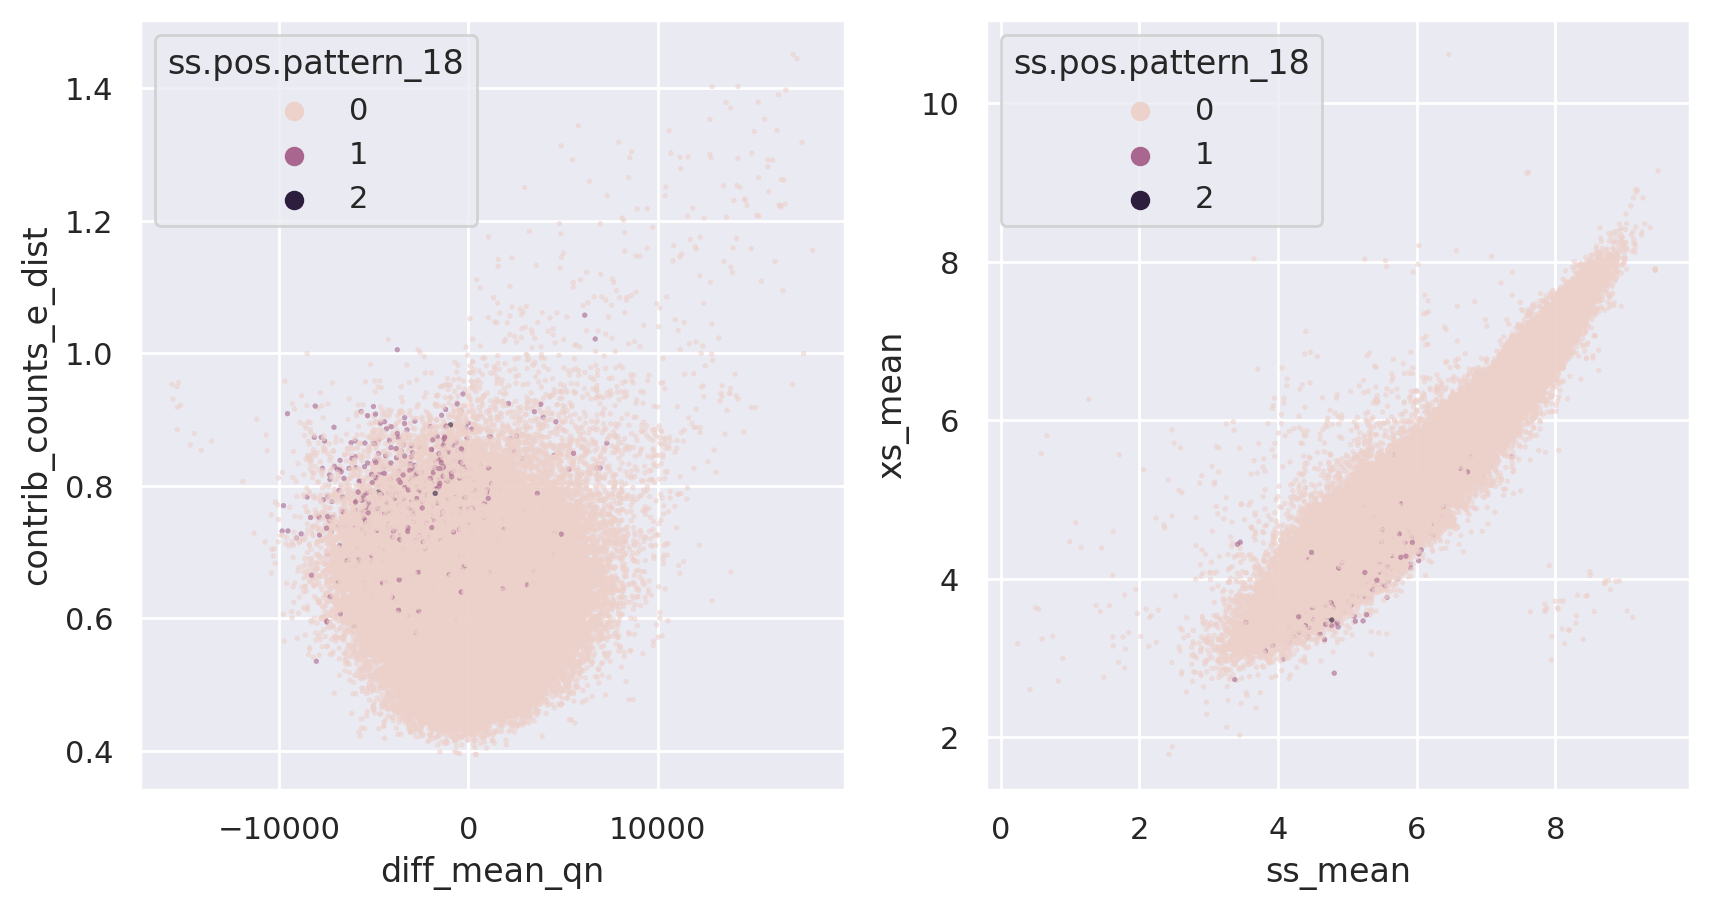

In [15]:
plot_pattern("ss.pos.pattern_18")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


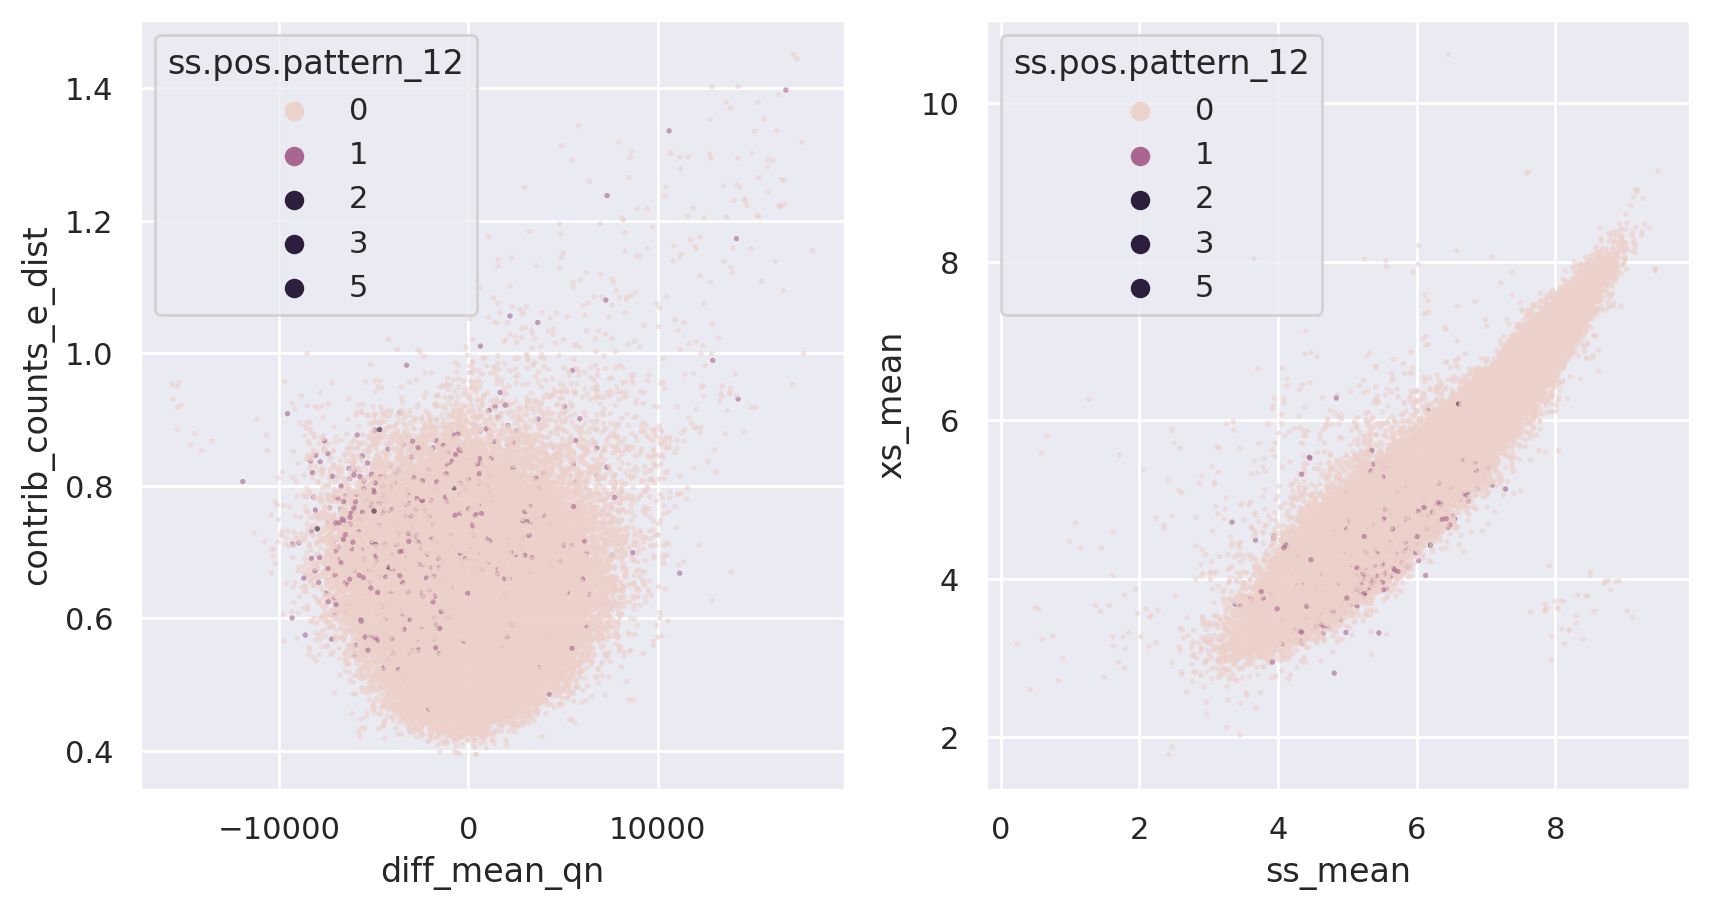

In [16]:
plot_pattern("ss.pos.pattern_12")



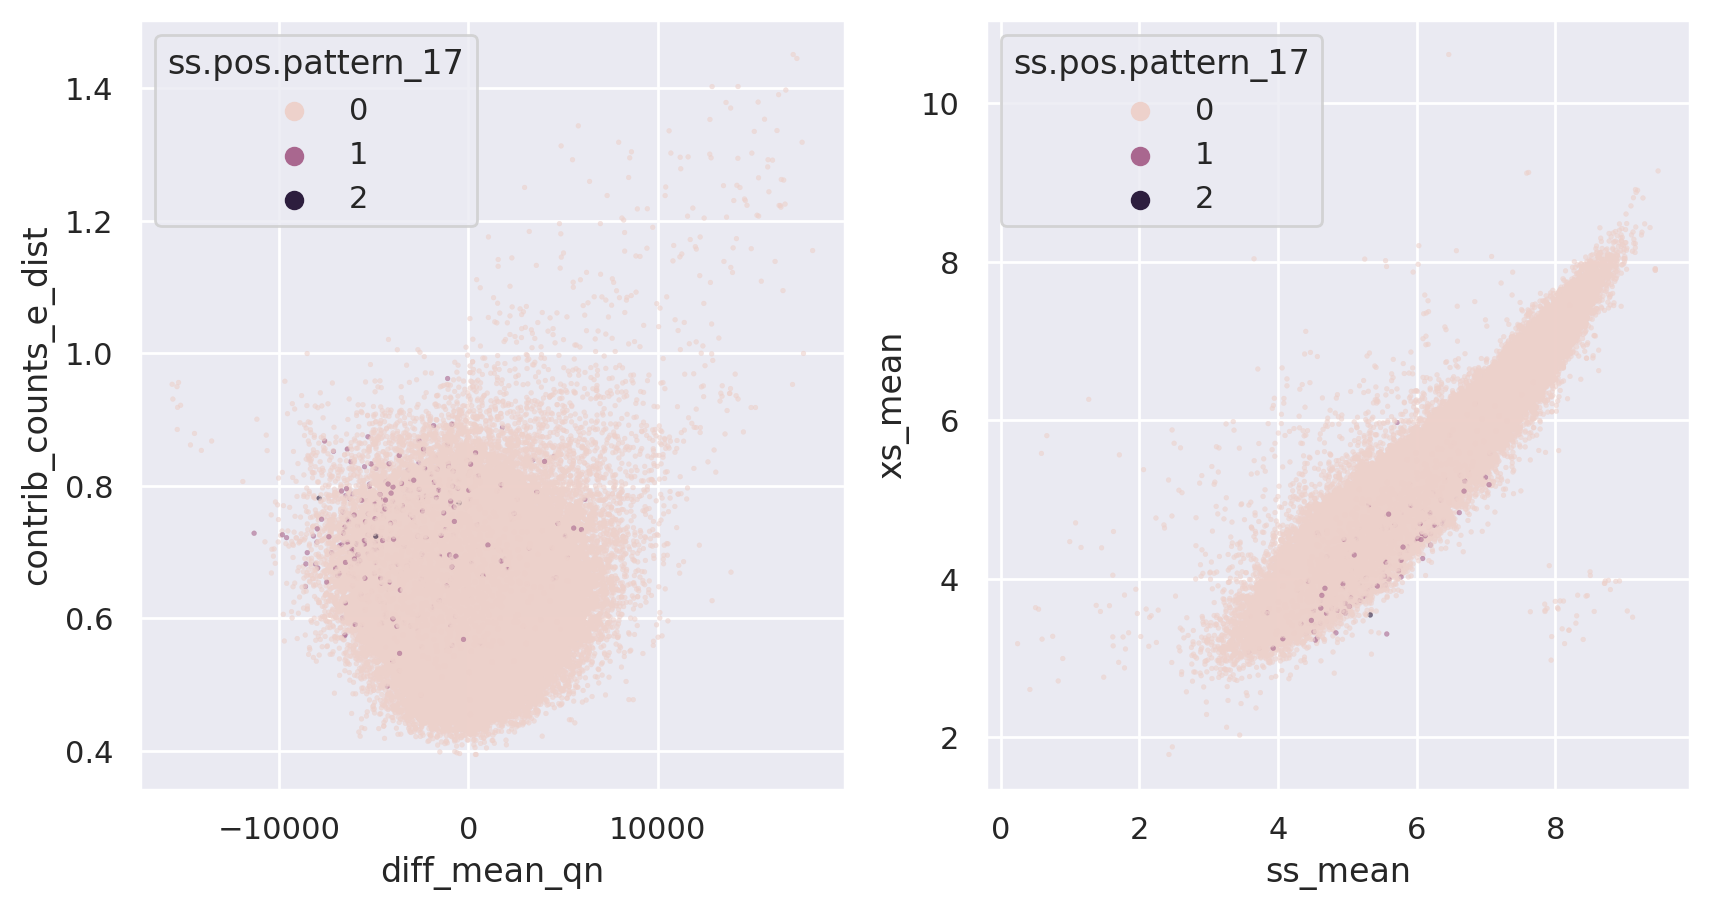

In [17]:
plot_pattern("ss.pos.pattern_17")
